In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

# Importing the dataset
Below we import & clean up the top 50 songs of 2019 using pandas:

In [74]:
top50 = pd.read_csv("top50.csv", encoding='latin-1')
top50 = top50.rename(columns={"Track.Name": "Track Name", "Artist.Name": "Artist", "Beats.Per.Minute": "BPM", "Loudness..dB..": 'Loudness', "Valence.": 'Valence', "Length.": 'Length', "Acousticness..": 'Acousticness', "Speechiness." : "Speechiness"})
top50 = top50.drop(columns="Unnamed: 0")
top50.head()

,Track Name,Artist,Genre,BPM,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


# Using seaborn

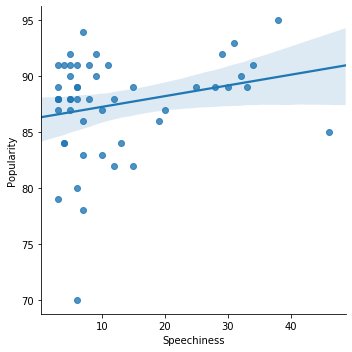

In [75]:
sns.lmplot(x='Speechiness', y='Popularity',  data=top50)

In [76]:
popular = top50.sort_values('Popularity', ascending=False)

In [78]:
popular_genres = top50.groupby('Genre').agg(np.mean).sort_values('Popularity', ascending=False)

In [97]:
popular_artists = top50.groupby('Artist').count().sort_values('Popularity', ascending=False)
top10artists = popular_artists.iloc[0:10]
top10artists = top10artists.index

In [108]:
top10 = top50[top50['Artist'].isin(top10artists)]
top10

,Track Name,Artist,Genre,BPM,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
5,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
8,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
9,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95
13,Otro Trago - Remix,Sech,panamanian pop,176,79,73,-2,6,76,288,7,20,87
16,LA CANCIÓN,J Balvin,latin,176,65,75,-6,11,43,243,15,32,90
17,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,dfw rap,90,48,76,-6,7,91,158,56,5,91


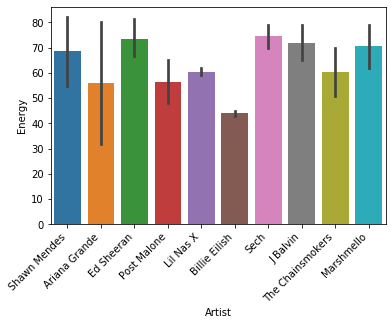

In [107]:
energy = sns.barplot(x='Artist', y='Energy', data=top10)
energy.set_xticklabels(energy.get_xticklabels(), rotation=45, horizontalalignment='right');
# plt.setp(pop.get_xticklabels(), rotation=45)

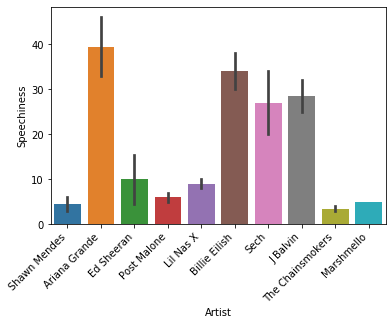

In [109]:
pop = sns.barplot(x='Artist', y='Speechiness', data=top10)
pop.set_xticklabels(pop.get_xticklabels(), rotation=45, horizontalalignment='right');